In [1]:
!pip install ultralytics==8.0.92 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.1/562.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 2.6 MB/s eta 0:00:00


In [2]:
import cv2
from tensorflow.config import list_physical_devices
from ultralytics import YOLO, __version__

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import random
from pathlib import Path

In [3]:
# Load a model
# YOLOv8n   nano
# YOLOv8s   small
# YOLOv8m	medium
# YOLOv8l	large
# YOLOv8x   xlarge
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

__version__ # 8.0.92 (important au 16/05/2023 pour unity)

100%|██████████| 6.23M/6.23M [00:00<00:00, 207MB/s]


'8.0.92'

## Seed it all

In [4]:
def seed_it_all(seed=42):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)

SEED = 42
seed_it_all(SEED)  # Reproducible

# Data

- 100 images version : "https://universe.roboflow.com/ds/2CmvgFyGkd?key=icMGXIAKBg"
- 1000 images version : 
    - V1 : "https://app.roboflow.com/ds/R6JxsTXqjk?key=uDQGjYyW8k"
    - V2 : "https://app.roboflow.com/ds/7iTM3nNxY8?key=5LTNkdyrLO"
    - V3 "https://app.roboflow.com/ds/V6yUp1xxmu?key=sgt6VZQUgy"

In [ ]:
!rm -r dataset
!mkdir dataset
%cd dataset
!curl -L "https://app.roboflow.com/ds/V6yUp1xxmu?key=sgt6VZQUgy" > roboflow.zip 
!unzip roboflow.zip 
!rm roboflow.zip
%cd ..

In [6]:
!pwd

/content


In [7]:
DATA = "/content/dataset/data.yaml"

# Train model

In [8]:
epochs = 200 if list_physical_devices('GPU') else 1
epochs

200

In [9]:
# https://docs.ultralytics.com/modes/train/#arguments
model.train(data=DATA, epochs=epochs, batch=8, patience=20, cos_lr=True, optimizer="SGD", seed=SEED, exist_ok=True)

New https://pypi.org/project/ultralytics/8.0.110 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.92 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=200, patience=20, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=True, pretrained=False, optimizer=SGD, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tr

# Evaluate model

In [10]:
score = model.val()  # evaluate model performance on the validation set
print("-"*100)
print(score)

Ultralytics YOLOv8.0.92 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/dataset/valid/labels.cache... 232 images, 0 backgrounds, 0 corrupt: 100%|██████████| 232/232 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.76it/s]
                   all        232       1125      0.881      0.792      0.857      0.559
                 Glass        232         74      0.888      0.754      0.895       0.46
                Gloves        232        232       0.97      0.843      0.927      0.605
                Helmet        232        107       0.97      0.913      0.969      0.598
             No-Helmet        232         54      0.867      0.833      0.875      0.574
       Not_Safety_Boot        232         20      0.831       0.65      0.715       0.43
       Not_Safety_Vest       

----------------------------------------------------------------------------------------------------
ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7fc7f3c63cd0>
fitness: 0.5892675689995335
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.46045,     0.60489,     0.59755,     0.57424,     0.43035,     0.67681,     0.75682,     0.40248,      0.2856,     0.62835,     0.73668])
names: {0: 'Glass', 1: 'Gloves', 2: 'Helmet', 3: 'No-Helmet', 4: 'Not_Safety_Boot', 5: 'Not_Safety_Vest', 6: 'Person', 7: 'Prise_libre', 8: 'Prise_occupe', 9: 'Safety-Boot', 10: 'Safety-Vest'}
plot: True
results_dict: {'metrics/precision(B)': 0.880857276140016, 'metrics/recall(B)': 0.792320647883237, 'metrics/mAP50(B)': 0.8574027669387069, 

In [11]:
score.results_dict

{'metrics/precision(B)': 0.880857276140016,
 'metrics/recall(B)': 0.792320647883237,
 'metrics/mAP50(B)': 0.8574027669387069,
 'metrics/mAP50-95(B)': 0.5594747692285141,
 'fitness': 0.5892675689995335}

## Benchmark 1000 image

---

- model=yolov8m.pt epochs=10 batch=8 optimizer="SGD"
    - 10 epochs completed in 0.114 hours (6min50s).
    - Speed: 1.7ms preprocess, 10.8ms inference, 0.0ms loss, 6.1ms postprocess per image
    - {'metrics/precision(B)': 0.7137401436958013, <br>
 'metrics/recall(B)': 0.3906436990811346,<br>
 'metrics/mAP50(B)': 0.4122662011868973,<br>
 'metrics/mAP50-95(B)': 0.1558081419868786,<br>
 'fitness': 0.18145394790688046}


 ---


- model=yolov8x.pt epochs=10 batch=8 optimizer="SGD"
    - 10 epochs completed in 0.206 hours (12min21s).
    - Speed: 1.3ms preprocess, 26.0ms inference, 0.0ms loss, 4.8ms postprocess per image
    - {'metrics/precision(B)': 0.845172361911081,<br>
 'metrics/recall(B)': 0.7892870177235691,<br>
 'metrics/mAP50(B)': 0.8591855579785578,<br>
 'metrics/mAP50-95(B)': 0.5227015082444837,<br>
 'fitness': 0.5563499132178911}


 ---

- model=yolov8x.pt epochs=100 batch=8 optimizer="SGD"
    - 100 epochs completed in 1.927 hours
    - Speed: 1.4ms preprocess, 69.5ms inference, 0.0ms loss, 3.3ms postprocess per image
    - {'metrics/precision(B)': 0.8775935812722815,<br>
 'metrics/recall(B)': 0.8308274089045242,<br>
 'metrics/mAP50(B)': 0.888124107897165,<br>
 'metrics/mAP50-95(B)': 0.5817336605969997,<br>
 'fitness': 0.6123727053270163}


---


- model=yolov8s.pt epochs=50 batch=8 optimizer="SGD"
    - 50 epochs completed in 0.450 hours.
    - Speed: 2.0ms preprocess, 6.4ms inference, 0.0ms loss, 1.9ms postprocess per image
    - {'metrics/precision(B)': 0.8642318285633591,<br>
 'metrics/recall(B)': 0.8149273588244231,<br>
 'metrics/mAP50(B)': 0.860376684820912,<br>
 'metrics/mAP50-95(B)': 0.5403261716011794,<br>
 'fitness': 0.5723312229231526}
 
 
 ---


- model=yolov8s.pt epochs=100 batch=8 optimizer="SGD"
    - 100 epochs completed in 0.890 hours.
    - Speed: 1.4ms preprocess, 6.8ms inference, 0.0ms loss, 1.9ms postprocess per image
    - {'metrics/precision(B)': 0.8721311055816404,<br>
 'metrics/recall(B)': 0.7957255949210339,<br>
 'metrics/mAP50(B)': 0.8568969250357563,<br>
 'metrics/mAP50-95(B)': 0.550924251075708,<br>
 'fitness': 0.5815215184717129}


 ---

**model failed durring training**
 - model=yolov8s.pt epochs=245 batch=8 optimizer="Adam"
    - Speed: 1.6ms preprocess, 10.5ms inference, 0.0ms loss, 2.9ms postprocess per image
    - {'metrics/precision(B)': 0.8022371967098305,<br>
 'metrics/recall(B)': 0.7395532069916423,<br>
 'metrics/mAP50-95(B)': 0.5009338114473753,<br>
 'fitness': 0.5300387279620672}<br>
    


---

- model=yolov8s.pt epochs=245 batch=8 optimizer="Adam"
    - Speed: 1.3ms preprocess, 6.5ms inference, 0.0ms loss, 5.9ms postprocess per image
    - {'metrics/precision(B)': 0.7806427749598683,<br>
 'metrics/recall(B)': 0.7518683813486654,<br>
 'metrics/mAP50(B)': 0.7837914068570838,<br>
 'metrics/mAP50-95(B)': 0.4914795952464192,<br>
 'fitness': 0.5207107764074856}

# Prediction

In [12]:
test_dir_im = Path("/content/dataset/test/images")

test_im = []
for path in test_dir_im.glob("*.jpg"):
    test_im.append(str(path))


In [13]:
test_im_path = np.random.choice(test_im)
results = model.predict(test_im_path)  # predict on an image

test_im_path


image 1/1 /content/dataset/test/images/sic2817_jpg.rf.cd6d0d36366ad4de16a57864d95f0a45.jpg: 640x640 2 Helmets, 1 Person, 1 Safety-Boot, 7.3ms
Speed: 1.7ms preprocess, 7.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


'/content/dataset/test/images/sic2817_jpg.rf.cd6d0d36366ad4de16a57864d95f0a45.jpg'

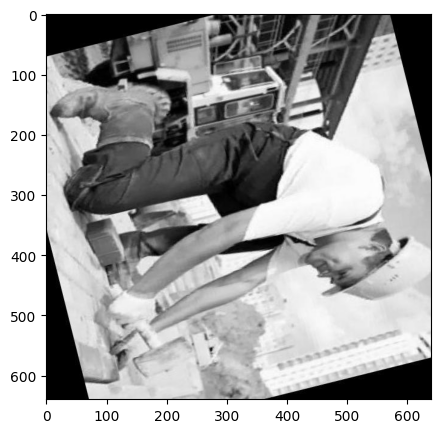

In [14]:
img = results[0].orig_img

plt.figure(figsize=(7, 5))
plt.grid(False)
plt.imshow(img)

## Usefull function

In [15]:
def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
    lw = max(round(sum(image.shape) / 2 * 0.003), 2)
    p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
    cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
    if label:
        tf = max(lw - 1, 1)  # font thickness
        w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
        outside = p1[1] - h >= 3
        p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
        cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image,
                    label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                    0,
                    lw / 3,
                    txt_color,
                    thickness=tf,
                    lineType=cv2.LINE_AA)


In [16]:
LABELS = {0: 'Glass', 1: 'Gloves', 2: 'Helmet', 
          3: 'No-Helmet', 4: 'Not_Safety_Boot', 5: 'Not_Safety_Vest', 
          6: 'Person', 7: 'Prise_libre', 8: 'Prise_occupe', 
          9: 'Safety-Boot', 10: 'Safety-Vest'}

COLORS = [(89, 161, 197),(67, 161, 255),(19, 222, 24),
          (186, 55, 2),(167, 146, 11),(190, 76, 98),
          (130, 172, 179),(115, 209, 128),(204, 79, 135),
          (156, 238, 54), (98, 145, 101)]

In [17]:
def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
    if labels == []:
        labels = LABELS
    if colors == []:
        colors = COLORS

    #plot each boxes
    for box in boxes:
        if score :
            label = labels[int(box[-1])] + " " + str(round(100 * float(box[-2]),1)) + "%"
        else :
            label = labels[int(box[-1])]
        #filter every box under conf threshold if conf threshold setted
        if conf :
            if box[-2] > conf:
                color = colors[int(box[-1])]
                box_label(image, box, label, color)
        else:
            color = colors[int(box[-1])]
            box_label(image, box, label, color)

        #show image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image) 

## Plot box

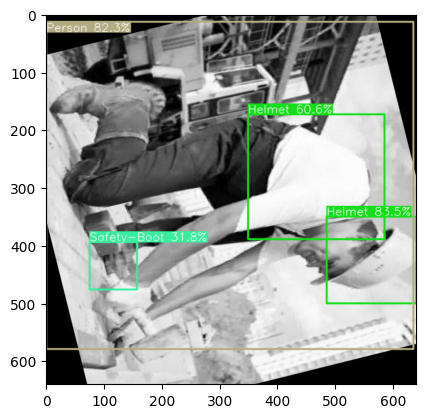

In [18]:
plot_bboxes(img, results[0].boxes.data, score=True)

# Visualize

In [19]:
TRAIN_DIR = Path.cwd() / "runs" / "detect" / "train"

png_im = []
for path in TRAIN_DIR.glob("*.png"):
    png_im.append( (cv2.imread(str(path)), path) )
    print(path)

/content/runs/detect/train/P_curve.png
/content/runs/detect/train/PR_curve.png
/content/runs/detect/train/F1_curve.png
/content/runs/detect/train/results.png
/content/runs/detect/train/R_curve.png
/content/runs/detect/train/confusion_matrix.png


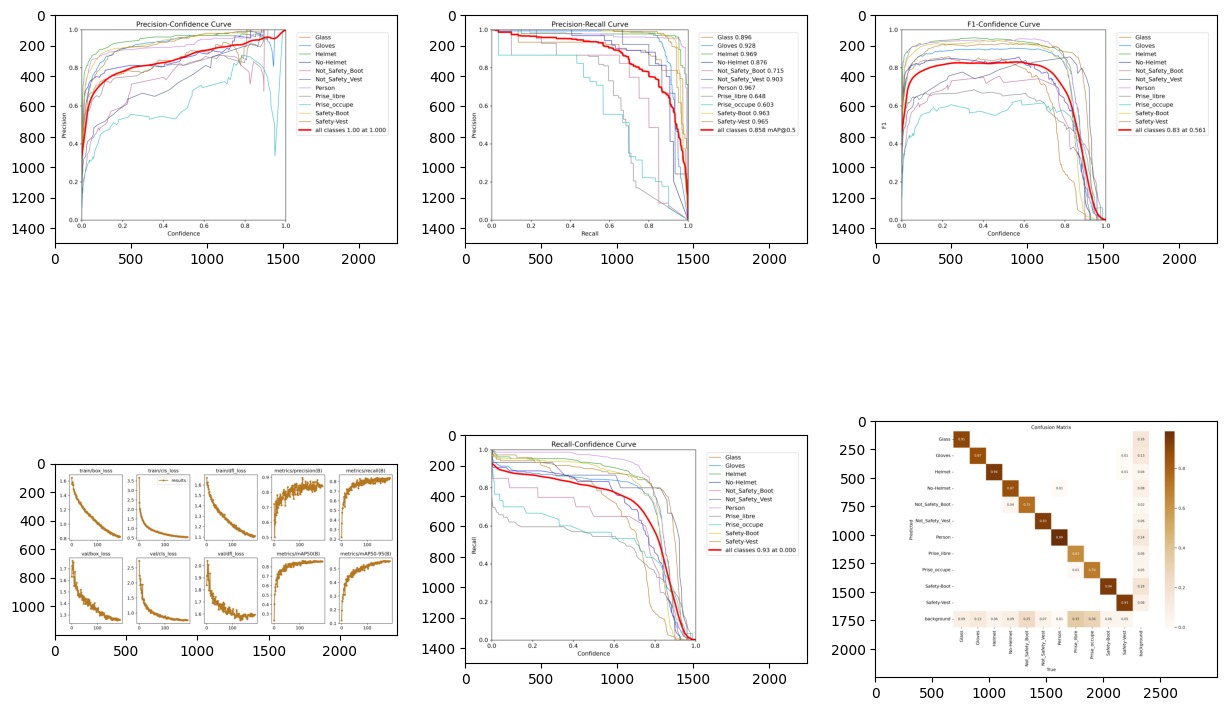

In [20]:
ncols = 3
nrows = int(np.ceil(len(png_im)/ncols))

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))
axs = axs.flatten()

for ax, im in zip(axs, png_im):
    ax.imshow(im[0])

plt.savefig("history.png",format="png", dpi=1000)

# ONNX

ONNX (Open Neural Network Exchange) is an open-source format for representing deep learning models. It is designed to provide interoperability between different deep learning frameworks such as TensorFlow, PyTorch, and others. The main goal of ONNX is to enable developers to train models using one framework and then deploy them on another framework for inference without any retraining or conversion issues.

In the context of YOLO, ONNX can be used to represent the trained YOLO model in a standard format that can be easily shared and deployed across different frameworks and platforms. This helps developers to avoid being locked into a specific framework and provides more flexibility in terms of deployment options.

For example, you might train a YOLO model using PyTorch and then export the model to the ONNX format. This ONNX model can then be imported into another framework, like TensorFlow or ONNX Runtime, for further optimization or deployment on a wide range of devices, including CPUs, GPUs, and specialized accelerators.

In summary, ONNX serves as a bridge between different deep learning frameworks, making it easier to share and deploy models, including YOLO object detection models, across various platforms and devices.

In [21]:
# if list_physical_devices('GPU') :
#     !pip install onnxruntime-gpu --quiet 
# else :
#     !pip install onnxruntime --quiet

# !pip install onxx --quiet

In [22]:
onnx_model_path = model.export(format="onnx")

Ultralytics YOLOv8.0.92 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU

PyTorch: starting from runs/detect/train/weights/best.pt with input shape (8, 3, 640, 640) BCHW and output shape(s) (8, 15, 8400) (6.0 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 348.6 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success ✅ 10.9s, saved as runs/detect/train/weights/best.onnx (11.7 MB)

Export complete (13.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 da

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



# Download

In [23]:
from IPython.display import FileLink

FileLink(onnx_model_path)

/content/runs/detect/train/weights/best.onnx

In [24]:
best_model = "runs/detect/train/weights/best.pt"
FileLink(best_model)

/content/runs/detect/train/weights/best.pt

In [25]:
history = "history.png"
FileLink(history)

/content/history.png